# Digital Earth Australia Intertidal workflow

## Getting started
Set working directory to top level of repo to ensure links work correctly:

In [1]:
%cd /home/jovyan/dea_intertidal/dea-intertidal/

/home/jovyan/dea_intertidal/dea-intertidal


In [ ]:
cd ..

Install additional packages directly from the requirements file

In [ ]:
pip install -r requirements.in --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyndex 0.5.0 requires pandas>=2.0.3, but you have pandas 1.5.3 which is incompatible.
spyndex 0.5.0 requires xarray>=2023.6.0, but you have xarray 2023.1.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install sunriset

  Using cached sunriset-1.0-py3-none-any.whl (9.6 kB)


### Load packages

In [ ]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from ipyleaflet import basemaps, basemap_to_tiles

import datacube
from odc.geo.geom import Geometry
from odc.ui import select_on_a_map

from intertidal.utils import (
    round_date_strings,
    export_intertidal_rasters,
    intertidal_hillshade,
)
from intertidal.elevation import load_data, load_topobathy, elevation
from intertidal.extents import extents
from intertidal.exposure import exposure
from intertidal.tidal_bias_offset import bias_offset, tidal_offset_tidelines
from dea_tools.dask import create_local_dask_cluster

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup


### Set analysis parameters

In [ ]:
# Intertidal Elevation variables
start_date = "2019"  # Start date for analysis
end_date = "2021"  # End date for analysis
resolution = 10  # Spatial resolution used for output files
crs = "EPSG:3577"  # Coordinate Reference System (CRS) to use for output files
ndwi_thresh = 0.1  # Threshold used to identify dry/wet transition
include_s2 = True  # Include Sentinel-2 data in the analysis?
include_ls = True  # Include Landsat data in the analysis?
filter_gqa = False  # Filter to remove poorly georeferenced scenes?
tide_model = "FES2014"  # Tide model to use in analysis
tide_model_dir = "/var/share/tide_models"  # Directory containing tide model files
# tide_model = ["FES2014", "FES2012", "TPXO9-atlas-v5"]
# tide_model_dir = "/gdata1/data/tide_models_clipped"

# Exposure variables
modelled_freq = "3h"  # Frequency to run tidal model e.g '30min' or '1h'

# Generate range of times covering entire period of satellite record for exposure and bias/offset calculation
all_timerange = pd.date_range(
    start=round_date_strings(start_date, round_type="start"),
    end=round_date_strings(end_date, round_type="end"),
    freq=modelled_freq,
)

#### Set study area

##### Option 1: load study area from 32 km tile GridSpec

In [ ]:
# Set study area (e.g. tile ID in form 'x143y87')
study_area = "x133y40"
geom = None  # Use GridSpec to load study area, not a custom geom

##### Option 2: load study area from vector file

In [ ]:
# # Set study area to load from file
# study_area = "pointstuart"

# # Read file, select study area and convert to geom
# studyarea_gdf = gpd.read_file(
#     "data/raw/intertidal_development_polygons.geojson"
# ).set_index("id")
# geom = Geometry(studyarea_gdf.loc[study_area].geometry, crs=studyarea_gdf.crs)
# geom

##### Option 3: load study area using interactive map

Map(center=[-26, 135], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

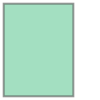

In [ ]:
# Set study area name for outputs
study_area = "testing"

# Plot interactive map to select area
basemap = basemap_to_tiles(basemaps.Esri.WorldImagery)
geom = select_on_a_map(height="600px", layers=(basemap,), center=(-26, 135), zoom=4)
geom

## Intertidal workflow

### Load data

In [ ]:
%%time

# Connect to datacube
dc = datacube.Datacube(app="Intertidal_elevation")

# Create local dask cluster to improve data load time
client = create_local_dask_cluster(return_client=True)

satellite_ds = load_data(
    dc=dc,
    study_area=study_area,
    geom=geom,
    time_range=(start_date, end_date),
    resolution=resolution,
    crs=crs,
    include_s2=True,
    include_ls=True,
    filter_gqa=filter_gqa,
    max_cloudcover=90,
    skip_broken_datasets=True,
)

print(satellite_ds)

# Load data
satellite_ds.load()

<<<<<<< local
/env/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46437 instead
  warnings.warn(
>>>>>>> remote
<<<<<<< local <modified: text/html, text/plain>


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/claire.phillips@ga.gov.au/proxy/46437/status,
Dashboard: /user/claire.phillips@ga.gov.au/proxy/46437/status,Workers: 1
Total threads: 62,Total memory: 477.21 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41811,Workers: 1
Dashboard: /user/claire.phillips@ga.gov.au/proxy/46437/status,Total threads: 62
Started: Just now,Total memory: 477.21 GiB
Comm: tcp://127.0.0.1:42625,Total threads: 62
Dashboard: /user/claire.phillips@ga.gov.au/proxy/39477/status,Memory: 477.21 GiB
Nanny: tcp://127.0.0.1:34019,


>>>>>>> remote <removed>
<<<<<<< local <modified: >


<xarray.Dataset>
Dimensions:      (time: 435, y: 3313, x: 2516)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-01T00:22:36.346000 ... 2021-12...
  * y            (y) float64 -2.387e+06 -2.387e+06 ... -2.42e+06 -2.42e+06
  * x            (x) float64 1.759e+06 1.759e+06 ... 1.784e+06 1.784e+06
    spatial_ref  int32 3577
Data variables:
    ndwi         (time, y, x) float32 dask.array<chunksize=(1, 1600, 1600), meta=np.ndarray>
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref


>>>>>>> remote <removed>
<<<<<<< local <modified: >
/env/lib/python3.10/site-packages/datacube/drivers/driver_cache.py:54: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import iter_entry_points
/env/lib/python3.10/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(
/env/lib/python3.10/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(
>>>>>>> remote <removed>
<<<<<<< local <modified: >


CPU times: user 46.5 s, sys: 18.1 s, total: 1min 4s
Wall time: 5min 7s


>>>>>>> remote <removed>


<xarray.Dataset>
Dimensions:      (time: 435, y: 3313, x: 2516)
Coordinates:
  * time         (time) datetime64[ns] 2019-01-01T00:22:36.346000 ... 2021-12...
  * y            (y) float64 -2.387e+06 -2.387e+06 ... -2.42e+06 -2.42e+06
  * x            (x) float64 1.759e+06 1.759e+06 ... 1.784e+06 1.784e+06
    spatial_ref  int32 3577
Data variables:
    ndwi         (time, y, x) float32 -0.5715 -0.53 -0.4722 ... nan nan nan
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### Load optional topobathy mask
Loads a topo-bathymetric DEM for the extents of the loaded satellite data.
This is used as a coarse mask to constrain the analysis to the coastal zone, improving run time and reducing clear false positives over deep water or elevated land.

In [ ]:
# Load data from GA's Australian Bathymetry and Topography Grid 2009
topobathy_ds = load_topobathy(
    dc, satellite_ds, product="ga_multi_ausbath_0", resampling="bilinear"
)

### Intertidal elevation
To run without the topobathy DEM mask, comment out `valid_mask=...`.

In [ ]:
# Model elevation for each pixel
ds, ds_aux, tide_m = elevation(
    satellite_ds,
    valid_mask=topobathy_ds.height_depth > -20,
    tide_model=tide_model,
    tide_model_dir=tide_model_dir,
)

<<<<<<< local <modified: >
2023-11-21 04:03:22 INFO Modelling tide heights for each pixel
>>>>>>> remote <removed>


Creating reduced resolution 5000 x 5000 metre tide modelling array
Modelling tides using FES2014, FES2012, TPXO8-atlas-v1, TPXO9-atlas-v5, EOT20, HAMTIDE11, GOT4.10 in parallel


100%|██████████| 35/35 [00:21<00:00,  1.62it/s]


Returning low resolution tide array
Generating ensemble tide model from point inputs


2023-11-21 04:04:12 INFO Masking nodata and adding tide heights to satellite data array
2023-11-21 04:04:26 INFO Flattening satellite data array and filtering to intertidal candidate pixels
2023-11-21 04:04:26 INFO Applying valid data mask to constrain study area
2023-11-21 04:06:29 INFO Running per-pixel rolling median
<<<<<<< local <modified: >


Reducing analysed pixels from 8324344 to 364640 (4.38%)


>>>>>>> remote <removed>
100%|██████████| 114/114 [06:55<00:00,  3.65s/it]
2023-11-21 04:13:43 INFO Modelling intertidal elevation


Applying tidal interval interpolation to 200 intervals
Applying rolling mean smoothing with radius 10


2023-11-21 04:13:48 INFO Modelling intertidal uncertainty
2023-11-21 04:14:11,906 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-11-21 04:14:13,765 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-11-21 04:14:21,809 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2023-11-21 04:14:23,278 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-11-21 04:14:24,800 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)
2023-11-21 04:14:26,388 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)
2023-11-21 04:14:28,058 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)
2023-11-21 04:14:29,840 - distri

### Intertidal extents


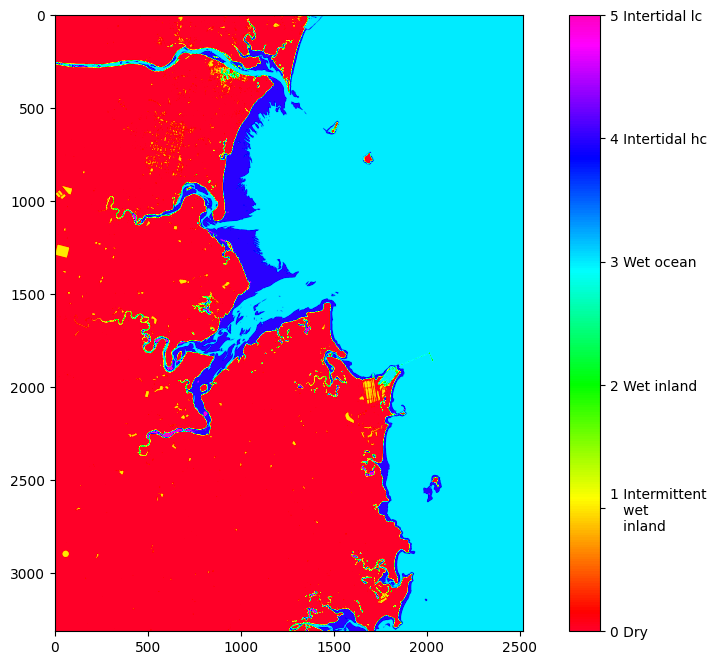

In [96]:
ds['extents'] = extents(freq=ds_aux.ndwi_wet_freq, dem=ds.elevation, corr=ds_aux.ndwi_tide_corr)

## Plot
labels=['0 Dry',
       '1 Intermittent\n   wet\n   inland',
       '2 Wet inland',
       '3 Wet ocean',
       '4 Intertidal hc',
       '5 Intertidal lc']

fig,ax=plt.subplots(figsize=(12,8))
cax=ax.imshow(ds['extents'], cmap='gist_rainbow')
cbar=fig.colorbar(cax, ticks=[0,1,2,3,4,5])
cbar.ax.set_yticklabels(labels)
plt.show()

In [97]:
# Create output folder. If it doesn't exist, create it
output_dir = f"data/interim/{study_area}"
os.makedirs(output_dir, exist_ok=True)
# Save rasters as GeoTIFFs
export_intertidal_rasters(
    ds, prefix=f"{output_dir}/{study_area}_{start_date}_{end_date}"
)
export_intertidal_rasters(
    ds_aux, prefix=f"{output_dir}/{study_area}_{start_date}_{end_date}"
)

In [103]:
# import xarray as xr
# import numpy as np

# import datacube
# from skimage.measure import label, regionprops
# from skimage.morphology import (binary_erosion, disk)

# def intertidal_connection(ds, ocean_da, connectivity=1, dilation=None):
#     """
    
#     Identifies ocean by selecting regions of water that overlap
#     with ocean pixels. This region can be optionally dilated to
#     ensure that the sub-pixel algorithm has pixels on either side
#     of the water index threshold.
#     Parameters:
#     -----------
#     ds : xarray.DataArray
#         An array containing True for land pixels, and False for water.
#         This can be obtained by thresholding a water index
#         array (e.g. MNDWI < 0).
#     ocean_da : xarray.DataArray
#         A supplementary static dataset used to separate ocean waters
#         from other inland water. The array should contain values of 1
#         for high certainty ocean pixels, and 0 for all other pixels
#         (land, inland water etc). For Australia, we use the  Geodata
#         100K coastline dataset, rasterized as the "geodata_coast_100k"
#         product on the DEA datacube.
#     connectivity : integer, optional
#         An integer passed to the 'connectivity' parameter of the
#         `skimage.measure.label` function.
#     dilation : integer, optional
#         The number of pixels to dilate ocean pixels to ensure than
#         adequate land pixels are included for subpixel waterline
#         extraction. Defaults to None.
#     Returns:
#     --------
#     intertidal_connection : xarray.DataArray
#         An array containing the a mask consisting of identified ocean
#         pixels as True.
#     """

#     # First, break all time array into unique, discrete regions/blobs.
#     # Fill NaN with 1 so it is treated as a background pixel
#     blobs = xr.apply_ufunc(label, ds.fillna(1), 1, False, connectivity)

#     # For each unique region/blob, use region properties to determine
#     # whether it overlaps with a water feature from `water_mask`. If
#     # it does, then it is considered to be directly connected with the
#     # ocean; if not, then it is an inland waterbody.
#     intertidal_connection = blobs.isin(
#         [i.label for i in regionprops(blobs.values, ocean_da.values) if i.max_intensity]
#     )

#     # Dilate mask so that we include land pixels on the inland side
#     # of each shoreline to ensure contour extraction accurately
#     # seperates land and water spectra
#     if dilation:
#         intertidal_connection = xr.apply_ufunc(binary_dilation, intertidal_connection, disk(dilation))

#     return intertidal_connection


# def extents(freq,
#            dem,
#            corr,
#            ):
#     '''
#     Classify coastal ecosystems into broad classes based 
#     on their respective patterns of wetting frequency,
#     relationship to tidal inundation and proximity to
#     intertidal pixels.

#     Parameters:
#     -----------
#     dem : xarray.DataArray
#         An xarray.DataArray of the final intertidal DEM, generated 
#         during the intertidal.elevation workflow
#     freq : xarray.DataArray
#         An xarray.DataArray of the NDWI frequency layer summarising the 
#         frequency of wetness per pixel for any given time-series, 
#         generated during the intertidal.elevation workflow
#     corr : xarray.DataArray
#         An xarray.DataArray of the correlation between pixel NDWI values
#         and the tide-height, generated during the intertidal.elevation workflow

#     Returns:
#     --------
#     extents: xarray.DataArray
#         A binary xarray.DataArray depicting intertidal (0), tidal-wet (1),
#         nontidal-wet (2), intermittently, non-tidal wet (3) and dry (4) coastal extents.
#     Notes:
#     ------
#     Classes are defined as follows:
#     '''
#     # 0: Dry
#     #     Pixels with wettness `freq` < 0.05
#     #     Includes intermittently dry pixels with wetness frequency < 0.5 and > 0.05
#     #     and `corr` to tide > 0.1 to capture intertidal pixels buffered
#     #     out by the `corr` threshold of 0.2
#     # 1: Intertidal
#     #     Frequency of pixel wetness (`freq`) is > 0.01 and < 0.99
#     #     The correlation (`corr`) between `freq` and tide-heights is > 0.2
#     # 2: Wet tidal
#     #     Frequency of pixel wetness (`freq`) is > 0.95
#     #     Includes intermittently wet pixels with `freq` > 0.5 and < 0.95,
#     #     and `corr` to tide > 0.1. This captures intertidal pixels buffered
#     #     out by the `corr` threshold of 0.2 (default)
#     #     Pixels are located offshore, within 10 pixels of known ocean, as defined
#     #     by the Geodata 100k coastline dataset (`ocean_da`)
#     # 3: Wet nontidal
#     #     Frequency of pixel wetness (`freq`) is > 0.95
#     #     Includes intermittently wet pixels with `freq` > 0.5 and < 0.95,
#     #     and `corr` to tide > 0.1. This captures intertidal pixels buffered
#     #     out by the `corr` threshold of 0.2 (default)
#     #     Pixels are located onshore, more than 10 pixels from known ocean, as defined
#     #     by the Geodata 100k coastline dataset (`ocean_da`)
#     # 4: Intermittently wet nontidal
#     #     Pixels with wetting `freq` between 0.95 and 0.05 and
#     #     `corr` of `freq` to tide is < 0.1    
    
#     ## Connect to datacube to load `ocean_da`
#     dc = datacube.Datacube(app='ocean_masking')
 
#     ## Set the upper and lower freq thresholds
#     upper, lower = 0.99, 0.01
    
#     '''--------------------------------------------------------------------'''
#     ## Identify broad classes based on wetness frequency and tidal correlation
#     dry = freq.where((freq < lower), drop=True)
#     intermittent = freq.where((freq>=lower)&(freq<=upper),np.nan)
#     wet = freq.where((freq>upper),np.nan)

#     ##### Separate intermittent_tidal (intertidal)
#     intertidal = freq.where(
#                         (freq==intermittent)
#                         &(corr>=0.15),
#                         drop=True
#                         )

#     ##### Separate intermittent_nontidal
#     intermittent_nontidal = freq.where(
#                         (freq==intermittent)
#                         &(corr<0.15),
#                         drop=False
#                         )
        
#     ##### Separate high and low confidence intertidal pixels
#     intertidal_hc = intertidal.where(dem.notnull(),drop=True)
#     intertidal_lc = intertidal.where(dem.isnull(),drop=True)
#     '''--------------------------------------------------------------------'''
#     ##### Classify 'wet' pixels based on connectivity to intertidal pixels (into 'wet_ocean' and 'wet_inland')

#     ## Create the 'always wet + intertidal' ds to compare against 'intertidal' pixels
#     ## only for intertidal connectivity
#     wet_intertidal = xr.where(freq>=lower,0,1)

#     ## If deep-sea masked pixels, replace Nans with 'wet' boolean (0)
#     if freq.isnull().any()==True is True:
#         wet_intertidal = wet_intertidal.where(freq.notnull(), 0)

#     ## Create a true/false layer of intertidal pixels (1) vs everything else (0)
#     # # Extract intertidal pixels (value 1) then erode these by 1 pixels to ensure we only
#     # # use high certainty intertidal regions for identifying connectivity to wet
#     # # pixels in our satellite imagery.
#     inter = freq.where((freq>=lower)&
#                           (freq<=upper)&
#                           (corr>=0.2))
#     ## Convert to true/false
#     inter = xr.where(freq==inter,True,False)
#     ## Drop Nans
#     if freq.isnull().any()==True is True:
#         inter = inter.where(freq.notnull(), drop=True)
#     ## Erode outer edge pixels by 1 pixel to drop extrema intertidal pixels and ensure connection 
#     ## to high certainty intertidal pixels (POSSIBLY UNNECCESARY due to corr definition of intertidal pixels)
#     inter = xr.apply_ufunc(binary_erosion, inter == 1, disk(1))

#     ## Applying intertidal_connection masking function for the first of two times
#     ## This first mask identifies where wet+intertidal pixels connect to intertidal pixels
#     intertidal_mask1 = intertidal_connection(wet_intertidal, inter, connectivity=1)

#     ## Prepare data to test for wet pixel connection to the connected 'wet and intertidal' mask.
#     ## Identify and relabel the pixels in 'freq' that are 'wet (0)' and 'other (1)'.
#     wet_bool = xr.where(freq==wet,False,True)
#     ## If deep-sea masked pixels, replace Nans with 'wet' boolean (0)
#     if freq.isnull().any()==True is True:
#         wet_bool = wet_bool.where(freq.notnull(), 0)

#     ## Applying intertidal_connection masking function for the second time
#     intertidal_mask2 = intertidal_connection(wet_bool, intertidal_mask1, connectivity=1)

#     # ## distinguish wet inland class from wet ocean class
#     wet_inland = wet_bool.where((wet_bool==0) & (intertidal_mask2 == False))#, drop=True) ## Weird artefacts when drop=True
#     wet_ocean = wet_bool.where((wet_bool==0) & (intertidal_mask2 == True), drop=True)

#     '''--------------------------------------------------------------------'''
#     ## Classify 'intermittently wet' pixels into 'intermittently_wet_inland' and 'other-intertidal_fringe'
#     ## Identify and relabel the pixels in 'freq' that are 'intermittent_nontidal wet (0)' and 'other (1)'.
#     int_nt = xr.where(freq==intermittent_nontidal,False,True)
#     ## If deep-sea masked pixels, replace Nans with 'wet' boolean (0)
#     if freq.isnull().any()==True is True:
#         int_nt = int_nt.where(freq.notnull(), 0)

#     ## Applying intertidal_connection masking function to separate inland from intertidal connected pixels
#     intertidal_mask = intertidal_connection(int_nt, intertidal_mask1, connectivity=1)

#     # ## distinguish intermittent inland from intermittent-other (intertidal_fringe) pixels
#     intermittent_inland = int_nt.where((int_nt==0) & (intertidal_mask == False))#, drop=True) ## Weird artefacts when drop=True
#     intertidal_fringe = int_nt.where((int_nt==0) & (intertidal_mask == True), drop=True)
    
#     ## Isolate mostly dry pixels from intertidal_fringe class
#     mostly_dry = intertidal_fringe.where(freq < 0.05, drop=True)
#     ## Isolate mostly wet pixels from intertidal fringe class
#     mostly_wet = intertidal_fringe.where(freq >= 0.05, drop=True)
#     '''--------------------------------------------------------------------'''
#     ## Combine wet_ocean and intertidal_fringe pixels
#     wet_ocean = wet_ocean.combine_first(mostly_wet)
    
#     ## Relabel pixels
#     dry = dry.where(dry.isnull(), 0)
#     wet_ocean = wet_ocean.where(wet_ocean.isnull(),3)
#     wet_inland = wet_inland.where(wet_inland.isnull(),2)
#     intermittent_inland = intermittent_inland.where(intermittent_inland.isnull(),1)
#     intertidal_hc = intertidal_hc.where(intertidal_hc.isnull(),4)
#     intertidal_lc = intertidal_lc.where(intertidal_lc.isnull(),5)
#     # Add intertidal_fringe pixels to wet_ocean class
#     # intertidal_fringe = intertidal_fringe.where(intertidal_fringe.isnull(),6)
#     mostly_dry = mostly_dry.where(mostly_dry.isnull(),6)
    

#     ## Combine
#     extents = dry.combine_first(wet_ocean)
#     extents = extents.combine_first(wet_inland)
#     extents = extents.combine_first(intertidal_hc)
#     extents = extents.combine_first(intermittent_inland)
#     # extents = extents.combine_first(intertidal_fringe)
#     extents = extents.combine_first(intertidal_lc)
#     extents = extents.combine_first(mostly_dry)

    
    
#     return extents

2023-11-21 05:40:47,718 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


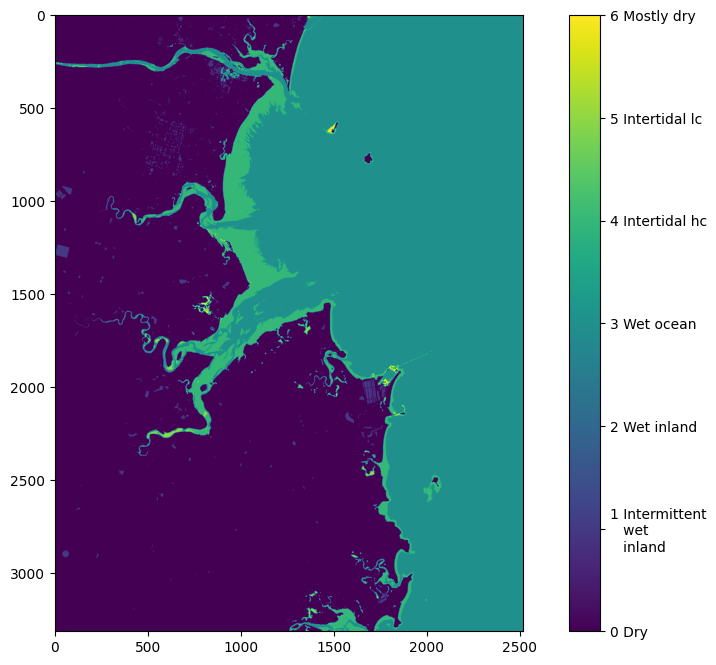

In [105]:
ds['extents'] = extents(freq=ds_aux.ndwi_wet_freq, dem=ds.elevation, corr=ds_aux.ndwi_tide_corr)

## Plot
labels=['0 Dry',
       '1 Intermittent\n   wet\n   inland',
       '2 Wet inland',
       '3 Wet ocean',
       '4 Intertidal hc',
       '5 Intertidal lc',
       '6 Mostly dry'
       ]

fig,ax=plt.subplots(figsize=(12,8))
cax=ax.imshow(ds['extents'])
cbar=fig.colorbar(cax, ticks=[0,1,2,3,4,5,6])
cbar.ax.set_yticklabels(labels)
plt.show()

In [106]:
# Create output folder. If it doesn't exist, create it
output_dir = f"data/interim/{study_area}"
os.makedirs(output_dir, exist_ok=True)
# Save rasters as GeoTIFFs
export_intertidal_rasters(
    ds, prefix=f"{output_dir}/{study_area}_{start_date}_{end_date}"
)
# export_intertidal_rasters(
#     ds_aux, prefix=f"{output_dir}/{study_area}_{start_date}_{end_date}"
# )

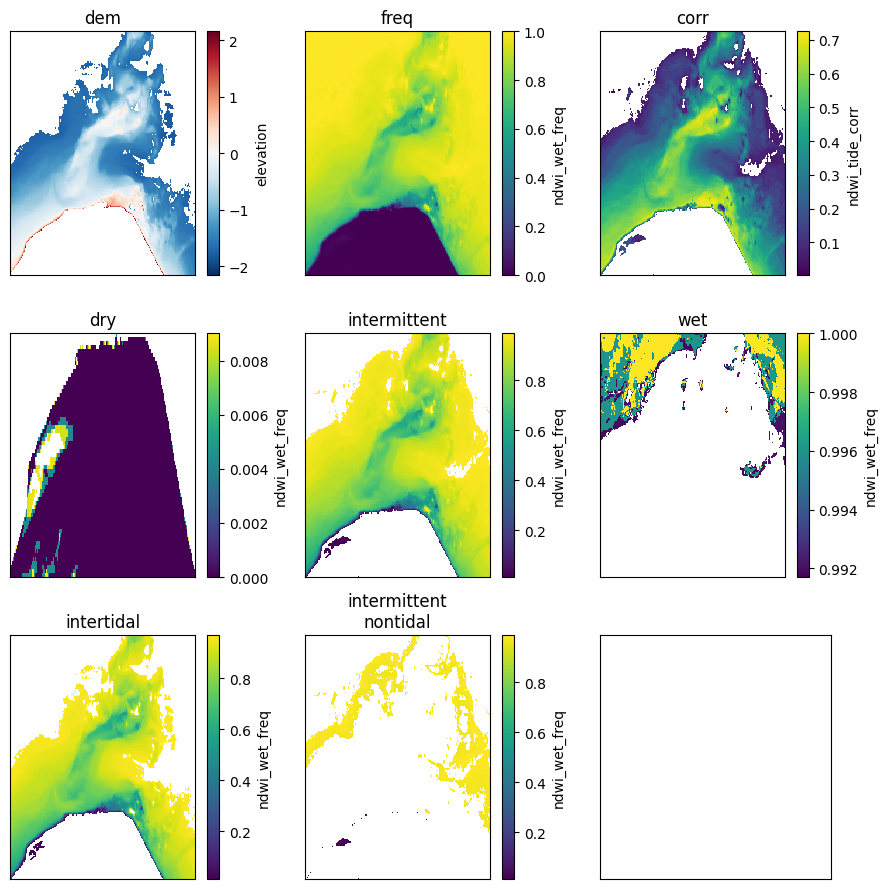

In [53]:
# ### freq=ds_aux.ndwi_wet_freq
# corr=ds_aux.ndwi_tide_corr
# dem =ds.elevation

# upper, lower = 0.99, 0.01

# ## Identify broad classes based on wetness frequency and tidal correlation
# dry = freq.where((freq < lower), drop=True)
# intermittent = freq.where((freq>=lower)&(freq<=upper),np.nan)
# wet = freq.where((freq>upper),np.nan)

# ##### Separate intermittent_tidal (intertidal)
# intertidal = freq.where(
#                     (freq==intermittent)
#                     &(corr>=0.15),
#                     drop=True
#                     )

# ##### Separate intermittent_nontidal
# intermittent_nontidal = freq.where(
#                     (freq==intermittent)
#                     &(corr<0.15),
#                     drop=False
#                     )

# fig, axes = plt.subplots(3,3,figsize=(9,9))

# dem.plot(ax=axes[0][0])
# axes[0][0].set_title('dem')
# freq.plot(ax=axes[0][1])
# axes[0][1].set_title('freq')
# corr.plot(ax=axes[0][2])
# axes[0][2].set_title('corr')

# dry.plot(ax=axes[1][0])
# axes[1][0].set_title('dry')
# intermittent.plot(ax=axes[1][1])
# axes[1][1].set_title('intermittent')
# wet.plot(ax=axes[1][2])
# axes[1][2].set_title('wet')

# intertidal.plot(ax=axes[2][0])
# axes[2][0].set_title('intertidal')
# intermittent_nontidal.plot(ax=axes[2][1])
# axes[2][1].set_title('intermittent\nnontidal')

# plt.setp(axes, xticks=[], yticks=[], xlabel='', ylabel='')

# fig.tight_layout()

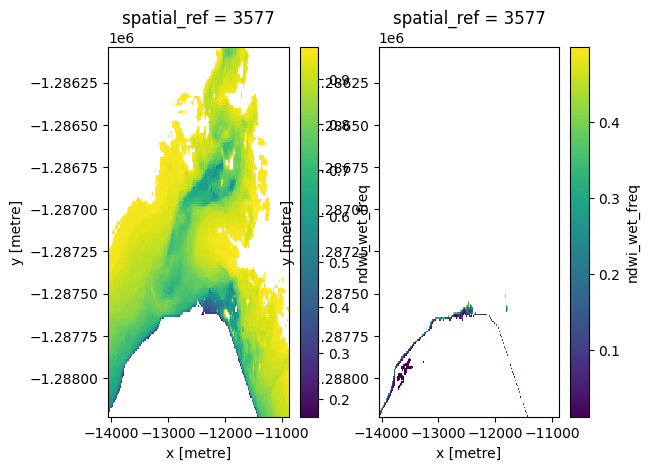

In [56]:
# fig, (ax1,ax2) = plt.subplots(1,2)
# intertidal.where(dem.notnull()).plot(ax=ax1)
# intertidal.where(dem.isnull()).plot(ax=ax2)

In [70]:
# ds_aux.ndwi_wet_freq.where(ds.extents==5).plot()

### Intertidal exposure
Calculate exposure using the script function

In [ ]:
ds["exposure"], tide_cq = exposure(
    dem=ds.elevation,
    time_range=all_timerange,
    tide_model=tide_model,
    tide_model_dir=tide_model_dir,
)

<<<<<<< local <removed>
100%|██████████| 101/101 [00:00<00:00, 566.68it/s]
>>>>>>> remote <modified: >


### Spread and offset
Calculate the spread and high/low tide biases of input observed images as a percentage of the modelled tide heights

In [ ]:
(
    ds["oa_lat"],
    ds["oa_hat"],
    ds["oa_lot"],
    ds["oa_hot"],
    ds["oa_spread"],
    ds["oa_offset_lowtide"],
    ds["oa_offset_hightide"],
) = bias_offset(
    tide_m=tide_m, tide_cq=tide_cq, extents=ds.extents, lot_hot=True, lat_hat=True
)

### Tideline confidence

In [ ]:
(hightideline, lowtideline, tidelines_gdf) = tidal_offset_tidelines(
    extents=ds.extents,
    offset_hightide=ds.oa_offset_hightide,
    offset_lowtide=ds.oa_offset_lowtide,
    distance=250,
)

## Plot all layers

In [ ]:
# Inspect contents of ds before plotting
ds

In [ ]:
fig = plt.figure(figsize=(16, 18), tight_layout=True)
ax_dict = fig.subplot_mosaic(
    """
    AAAABBBBCCCC
    DDDEEEFFFGGG
    HHHIIIJJJKKK
    LLLMMM......
    """,
    height_ratios=[1, 0.8, 0.8, 0.8],
)

# label_params = dict(add_labels=False, yticks=[], xticks=[])

# Plot Elevation with hillshade
ds["elevation"].plot.imshow(
    ax=ax_dict["A"],
    cmap="viridis",
    interpolation="bilinear",
)
intertidal_hillshade(ds["elevation"], ds["extents"], vert_exag=300).plot.imshow(
    ax=ax_dict["A"],
    interpolation="bilinear",
)
ax_dict["A"].set_title("Elevation (metres AMSL)")

# Plot uncertainty
ds["elevation_uncertainty"].plot.imshow(
    ax=ax_dict["B"],
    cmap="magma",
    interpolation="bilinear",
)
ax_dict["B"].set_title("Elevation uncertainty (metres)")
ax_dict["B"].set_facecolor("#2E2E2E")

# Plot Exposure
ds["exposure"].plot.imshow(
    ax=ax_dict["C"],
    cmap="RdYlGn",
    levels=np.arange(0, 100, 1),
    add_labels=False,
    yticks=[],
)
ax_dict["C"].set_title("Exposure")

# Plot the always/sometimes/never wet extents
ds["extents"].astype(np.int16).plot.imshow(ax=ax_dict["D"])
ax_dict["D"].set_title("Wet, Dry and Intertidal extent")

# Plot the observation spread
ds["oa_spread"].plot.imshow(
    ax=ax_dict["E"],
    vmin=0,
    vmax=100,
    cmap="magma",
    cbar_kwargs={"label": "% of tidal range observed"},
)
ax_dict["E"].set_title("Observation Spread (%)")

# Plot the high-tide offset
ds["oa_offset_hightide"].plot.imshow(
    ax=ax_dict["F"],
    vmin=0,
    vmax=40,
    cmap="magma",
    cbar_kwargs={"label": "% of high tide never observed"},
)
ax_dict["F"].set_title("High-tide offset (%)")

# Plot the low-tide offset
ds["oa_offset_lowtide"].plot.imshow(
    ax=ax_dict["G"],
    vmin=0,
    vmax=40,
    cmap="magma",
    cbar_kwargs={"label": "% of low tide never observed"},
)
ax_dict["G"].set_title("Low-tide offset (%)")

# Plot the LAT
ds["oa_lat"].plot.imshow(
    ax=ax_dict["H"],
    vmin=ds["oa_lat"].min(),
    vmax=ds["oa_hat"].max(),
    add_labels=False,
)
ax_dict["H"].set_title("Lowest Astronomical Tide")

# Plot the LOT
ds["oa_lot"].plot.imshow(
    ax=ax_dict["I"], vmin=ds["oa_lat"].min(), vmax=ds["oa_hat"].max()
)
ax_dict["I"].set_title("Lowest Observed Tide")

# Plot the HAT
ds["oa_hat"].plot.imshow(
    ax=ax_dict["J"],
    vmin=ds["oa_lat"].min(),
    vmax=ds["oa_hat"].max(),
    add_labels=False,
    yticks=[],
)
ax_dict["J"].set_title("Highest Astronomical Tide")

# Plot the HOT
ds["oa_hot"].plot.imshow(
    ax=ax_dict["K"],
    vmin=ds["oa_lat"].min(),
    vmax=ds["oa_hat"].max(),
)
ax_dict["K"].set_title("Highest Observed Tide")

# Plot the high and low tidelines with respective offset
ax_dict["L"].set_title("Lowtide line and lowtide offset")
lowtideline.plot(
    column="offset_lowtide",
    legend=True,
    vmin=0,
    vmax=40,
    cmap="magma",
    ax=ax_dict["L"],
    zorder=2,
)
tidelines_gdf.loc[[0], "geometry"].plot(ax=ax_dict["L"], zorder=1)
ax_dict["L"].set_xlim(left=ds.elevation.x.min(), right=ds.elevation.x.max())
ax_dict["L"].set_ylim(bottom=ds.elevation.y.min(), top=ds.elevation.y.max())

ax_dict["M"].set_title("Hightide line and hightide offset")
hightideline.plot(
    column="offset_hightide",
    legend=True,
    vmin=0,
    vmax=40,
    cmap="magma",
    ax=ax_dict["M"],
    zorder=2,
)
tidelines_gdf.loc[[1], "geometry"].plot(ax=ax_dict["M"], zorder=1)
ax_dict["M"].set_yticks([])
ax_dict["M"].set_xlim(left=ds.elevation.x.min(), right=ds.elevation.x.max())
ax_dict["M"].set_ylim(bottom=ds.elevation.y.min(), top=ds.elevation.y.max())

# Remove axis labels
for label, ax in ax_dict.items():
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_ylabel("")
    ax.set_xlabel("")

## Export layers

In [ ]:
# Create output folder. If it doesn't exist, create it
output_dir = f"data/interim/{study_area}/{start_date}-{end_date}"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# Save rasters as GeoTIFFs
export_intertidal_rasters(
    ds, prefix=f"{output_dir}/{study_area}_{start_date}_{end_date}"
)
export_intertidal_rasters(
    ds_aux, prefix=f"{output_dir}/{study_area}_{start_date}_{end_date}_debug"
)

In [ ]:
# Export figure
fig.savefig(f"data/figures/{study_area}_{start_date}_{end_date}.png")

In [ ]:
# Export vector files
hightideline.to_crs("EPSG:4326").to_file(
    f"{output_dir}/{study_area}_{start_date}_{end_date}_offset_hightide.geojson"
)
lowtideline.to_crs("EPSG:4326").to_file(
    f"{output_dir}/{study_area}_{start_date}_{end_date}_offset_lowtide.geojson"
)
tidelines_gdf.to_crs("EPSG:4326").to_file(
    f"{output_dir}/{study_area}_{start_date}_{end_date}_tidelines_highlow.geojson"
)

### Close Dask client

In [ ]:
client.close()